# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | sao vicente
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | mount isa
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | masterton
Processing Record 10 of Set 1 | muleba
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | barakani
Processing Record 13 of Set 1 | puerto baquerizo moreno
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | tucuma
Processing Record 16 of Set 1 | salekhard
Processing Record 17 of Set 1 | angra do heroismo
Processing Record 18 of Set 1 | kitimat
Processing Record 19 of Set 1 | yinzhu
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | slyudyanka
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | camana
Processing Record 41 of Set 4 | bushland beach
City not found. Skipping...
Processing Record 42 of Set 4 | manokwari
Processing Record 43 of Set 4 | korsakov
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | nagqu
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | governor's harbour
City not found. Skipping...
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | sterling
Processing Record 0 of Set 5 | fort bragg
Processing Record 1 of Set 5 | labytnangi
Processing Record 2 of Set 5 | eu
City not found. Skipping...
Processing Record 3 of Set 5 | santona
Processing Record 4 of Set 5 | czarna bialostocka
Processing Record 5 of Set 5 | nichinan
Processing Record 6 of Set 5 | revda
Processing Record 7 of Set 5 | riviere-du-loup
Processing Record 8 of Set 5 | iguape
Processing Record 9 of Set 5 | vingt cinq
City not found. Skipping...
Proc

Processing Record 29 of Set 8 | grand falls-windsor
Processing Record 30 of Set 8 | sarkhej
Processing Record 31 of Set 8 | uturoa
Processing Record 32 of Set 8 | portoferraio
Processing Record 33 of Set 8 | caburan
Processing Record 34 of Set 8 | chinchilla
Processing Record 35 of Set 8 | montrose
Processing Record 36 of Set 8 | mount pearl
Processing Record 37 of Set 8 | reuleuet
Processing Record 38 of Set 8 | miguel ahumada
Processing Record 39 of Set 8 | quepos
Processing Record 40 of Set 8 | bethanie
Processing Record 41 of Set 8 | ola
Processing Record 42 of Set 8 | rasht
Processing Record 43 of Set 8 | happy valley-goose bay
Processing Record 44 of Set 8 | noumea
Processing Record 45 of Set 8 | baiyin
Processing Record 46 of Set 8 | las veredas
Processing Record 47 of Set 8 | ad dilam
Processing Record 48 of Set 8 | tsetserleg
Processing Record 49 of Set 8 | kailua-kona
Processing Record 0 of Set 9 | bilicenii vechi
Processing Record 1 of Set 9 | aljezur
Processing Record 2 of 

Processing Record 19 of Set 12 | inarajan village
Processing Record 20 of Set 12 | goulburn
Processing Record 21 of Set 12 | contamana
Processing Record 22 of Set 12 | haiku-pauwela
Processing Record 23 of Set 12 | velasco ibarra
Processing Record 24 of Set 12 | zhangye
Processing Record 25 of Set 12 | taoudenni
Processing Record 26 of Set 12 | lodwar
Processing Record 27 of Set 12 | porto novo
Processing Record 28 of Set 12 | taroa
Processing Record 29 of Set 12 | ahtari
Processing Record 30 of Set 12 | moreira sales
Processing Record 31 of Set 12 | aioun
Processing Record 32 of Set 12 | suzuka
Processing Record 33 of Set 12 | kuching
Processing Record 34 of Set 12 | beau vallon
Processing Record 35 of Set 12 | siping
Processing Record 36 of Set 12 | torghay
Processing Record 37 of Set 12 | victoria falls
Processing Record 38 of Set 12 | atherton
Processing Record 39 of Set 12 | mongo
Processing Record 40 of Set 12 | angaur state
Processing Record 41 of Set 12 | dubbo
Processing Recor

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.20,69,50,12.80,PN,1689968763
1,georgetown,5.4112,100.3354,27.96,91,20,1.54,MY,1689968483
2,sao vicente,-23.9631,-46.3919,27.10,46,20,2.06,BR,1689968763
3,qaqortoq,60.7167,-46.0333,8.05,88,31,1.50,GL,1689968763
4,mount isa,-20.7333,139.5000,12.87,50,0,8.23,AU,1689968764


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.20,69,50,12.80,PN,1689968763
1,georgetown,5.4112,100.3354,27.96,91,20,1.54,MY,1689968483
2,sao vicente,-23.9631,-46.3919,27.10,46,20,2.06,BR,1689968763
3,qaqortoq,60.7167,-46.0333,8.05,88,31,1.50,GL,1689968763
4,mount isa,-20.7333,139.5000,12.87,50,0,8.23,AU,1689968764


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

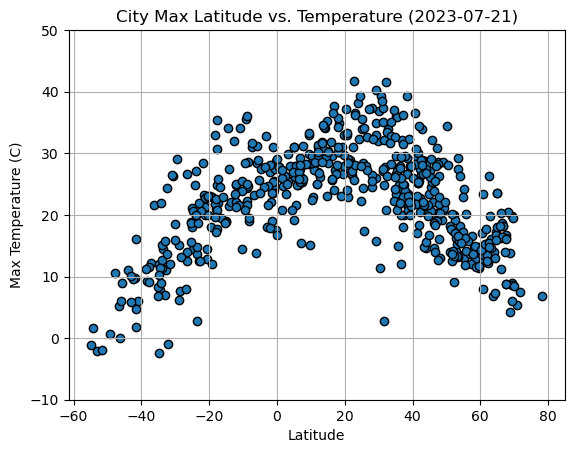

<Figure size 640x480 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-07-21)")
plt.grid(True)
plt.ylim(-10, 50)
plt.show()


# Save the figure
plt.savefig("../output_data/Fig1.png")



#### Latitude Vs. Humidity

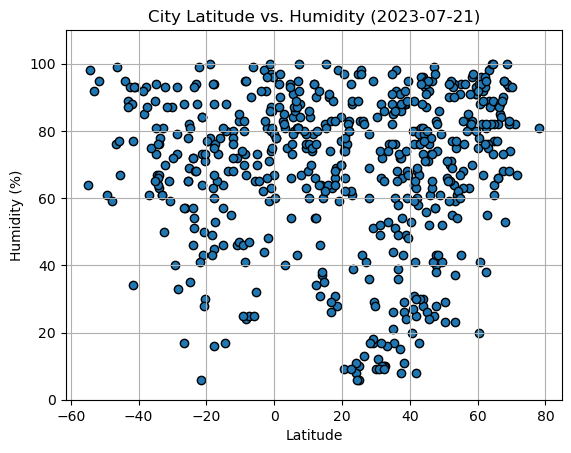

<Figure size 640x480 with 0 Axes>

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-21)")
plt.grid(True)
plt.ylim(0, 110)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")


#### Latitude Vs. Cloudiness

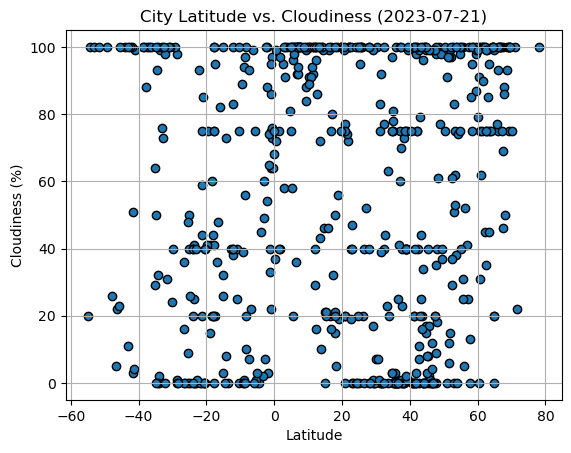

<Figure size 640x480 with 0 Axes>

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-21)")
plt.grid(True)
plt.ylim(-5, 105)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")


#### Latitude vs. Wind Speed Plot

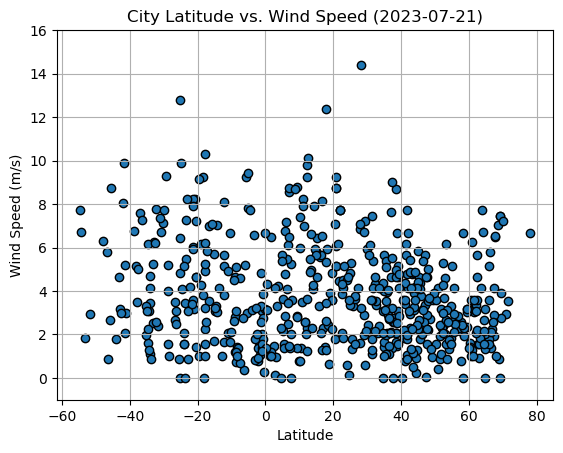

<Figure size 640x480 with 0 Axes>

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-07-21)")
plt.grid(True)
plt.ylim(-1, 16)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE